In [1]:
import numpy
import pandas

from metrics import incom_not_weighted, income_by_filter
import matplotlib.pyplot as plt

from process import load_data, transform_multipliers
from transformator import Multiplier
from transformator import Multiplier as M, transformators


df = load_data()
dft = transform_multipliers(df)
M = Multiplier
delta = df['delta']


In [2]:
from scipy.stats import gmean

s = dft[M.p_to_e]
for i in range(80,90, 10):
    print(incom_not_weighted(delta, s, i))
    # print((gmean(delta[s > i]/100 + 1) -1)*100 )
    

25.047281904228395


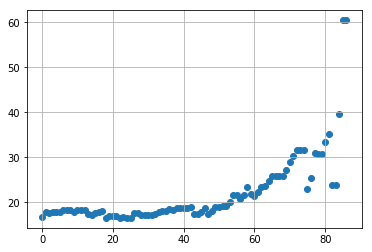

In [3]:
thresholds = list(range(0,100))
incoms = [incom_not_weighted(delta, dft[M.p_to_b], t) for t in thresholds]
plt.scatter(thresholds, incoms)
plt.grid()
plt.show()

In [4]:
dfinc = pandas.DataFrame()
for m in Multiplier:
    incoms = [incom_not_weighted(delta, dft[m], t) for t in thresholds]
    dfinc[m] = incoms
dfinc.index = thresholds

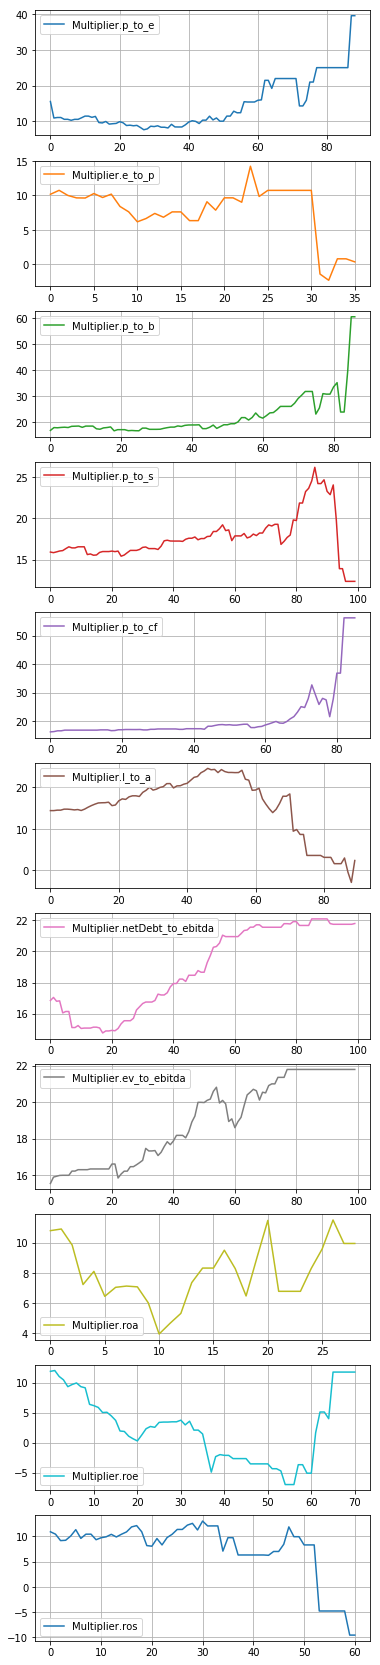

In [6]:
dfinc.plot(subplots=True, figsize=(6, 30), grid=True, sharex=False)
plt.show()

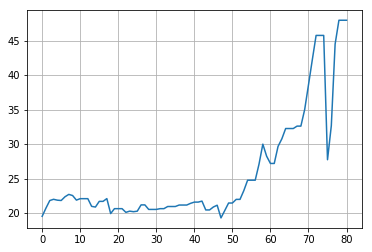

In [12]:
combo1 = dft[M.p_to_b] * (dft[M.netDebt_to_ebitda] > 50).astype(int)
incoms = [incom_not_weighted(delta, combo1, t) for t in thresholds]
pandas.Series(incoms).plot(grid=True)
plt.show()

In [16]:
combo1 = dft[M.p_to_b] * (dft[M.netDebt_to_ebitda] > 50).astype(int)
len(combo1[combo1 > 0])

96

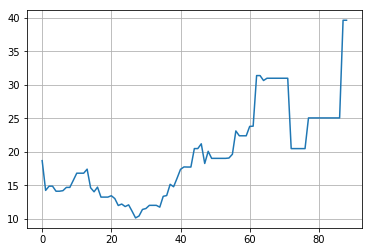

In [14]:
combo1 = dft[M.p_to_e] * (dft[M.netDebt_to_ebitda] > 50).astype(int)
incoms = [incom_not_weighted(delta, combo1, t) for t in thresholds]
pandas.Series(incoms).plot(grid=True)
plt.show()

In [15]:
combo1 = dft[M.p_to_e] * (dft[M.netDebt_to_ebitda] > 50).astype(int)
len(combo1[combo1 > 55])

37

In [9]:
print(M.p_to_b.value, transformators[M.p_to_b].restore(55.))
print(M.p_to_e.value, transformators[M.p_to_e].restore(40))
print(M.netDebt_to_ebitda.value, transformators[M.netDebt_to_ebitda].restore(60.))


P/B 0.9033936469967703
P/E 7.490975707764978
NetDebt / EBITDA 0.7828366734912544
